In [2]:
import math
import time

num = int(input("pick a number: "))
print(f"\n{'='*60}")
print(f"The number to factor is: {num}")
print(f"{'='*60}")

# Quick checks before starting the algorithm
print("\n[Step 1] Checking for simple cases...")
check_start = time.time()

# Check if even
if num % 2 == 0:
    check_end = time.time()
    print(f"✓ {num} is EVEN!")
    print(f"✓ Factor found immediately: 2 and {num // 2}")
    print(f"✓ Time: {check_end - check_start:.10f} seconds")
    # Don't use exit() in notebooks - it kills the kernel!
    # exit()  # Removed - causes kernel crash
else:
    print(f"  → {num} is odd, continuing...")

# Check if perfect power (n = a^b)
print("\n[Step 2] Checking if it's a perfect power (a^b)...")
for b in range(2, int(math.log2(num)) + 1):
    a = round(num ** (1/b))
    if a ** b == num:
        check_end = time.time()
        print(f"✓ {num} is a perfect power: {a}^{b}")
        print(f"✓ Base factor: {a}")
        print(f"✓ Time: {check_end - check_start:.10f} seconds")
        # Don't use exit() in notebooks - it kills the kernel!
        # exit()  # Removed - causes kernel crash

if num % 2 == 0 or any(round(num ** (1/b)) ** b == num for b in range(2, int(math.log2(num)) + 1)):
    print("\n✓ Factorization complete! (stopped early)")
else:
    print(f"  → Not a perfect power, using Shor's algorithm...")

    print(f"\n{'='*60}")
    print("Starting Shor's Algorithm (Classical Simulation)")
    print(f"{'='*60}")

    st = time.time()
    a = 2
    max_a = min(num, 100)

    while a < max_a:
        print(f"\n{'─'*60}")
        print(f"[Attempt with a = {a}]")
        print(f"{'─'*60}")
        
        # Calculate GCD
        gcd_start = time.time()
        print(f"  → Calculating GCD({a}, {num})...")
        gcd_a_num = math.gcd(a, num)
        gcd_end = time.time()
        print(f"  → GCD({a}, {num}) = {gcd_a_num}")
        print(f"  → GCD calculation time: {gcd_end - gcd_start:.10f} seconds")
        
        if gcd_a_num != 1:
            et = time.time()
            other_factor = num // gcd_a_num
            print(f"\n  ✓ Condition: 'Is GCD != 1?' → YES")
            print(f"  ✓ Factor found via GCD: {gcd_a_num} and {other_factor}")
            print(f"\n{'='*60}")
            print(f"SUCCESS! Factors are: {gcd_a_num} × {other_factor} = {num}")
            print(f"Total time taken: {et - st:.10f} seconds")
            print(f"{'='*60}")
            break
        else:
            print(f"  → Condition: 'Is GCD != 1?' → NO")
            print(f"  → GCD is 1, need to find order r...")
        
        # Find order r with optimized limit
        print(f"\n  [Finding order r]")
        print(f"  → Looking for smallest r where {a}^r mod {num} = 1...")
        r_start = time.time()
        r = 1
        found_r = False
        max_r = min(num, 10000)
        
        while r <= max_r:
            result = pow(a, r, num)
            if r <= 10 or r % 100 == 0:  # Print progress
                print(f"    • Testing r = {r}: {a}^{r} mod {num} = {result}")
            if result == 1:
                r_end = time.time()
                print(f"  ✓ Found order r = {r}! ({a}^{r} mod {num} = 1)")
                print(f"  ✓ Order finding time: {r_end - r_start:.10f} seconds")
                found_r = True
                break
            r += 1
        
        if not found_r:
            r_end = time.time()
            print(f"  ✗ Could not find order r within limit ({max_r})")
            print(f"  ✗ Time spent searching: {r_end - r_start:.10f} seconds")
            print(f"  → Moving to next value of a...")
            a += 1
            continue
        
        # Check if r is even
        print(f"\n  → Checking if r is even...")
        if r % 2 != 0:
            print(f"  ✗ Condition: 'Is r even?' → NO (r = {r} is odd)")
            print(f"  → Cannot proceed with this a, trying next value...")
            a += 1
            continue
        else:
            print(f"  ✓ Condition: 'Is r even?' → YES (r = {r})")
        
        # Calculate potential factors
        print(f"\n  [Calculating potential factors]")
        factor_start = time.time()
        print(f"  → Computing x = {a}^({r}//2) mod {num}...")
        x = pow(a, r // 2, num)
        factor_calc_time = time.time() - factor_start
        print(f"  → x = {a}^{r//2} mod {num} = {x}")
        print(f"  → Calculation time: {factor_calc_time:.10f} seconds")
        
        # Check if x = ±1 mod num (would give trivial factors)
        print(f"\n  → Checking if x = ±1 mod {num}...")
        if x == 1:
            print(f"  ✗ x = 1, this gives trivial factors")
            print(f"  → Trying next value of a...")
            a += 1
            continue
        elif x == num - 1:
            print(f"  ✗ x = {num - 1} (which is -1 mod {num}), gives trivial factors")
            print(f"  → Trying next value of a...")
            a += 1
            continue
        else:
            print(f"  ✓ x is not ±1, continuing...")
        
        gcd_final_start = time.time()
        print(f"\n  → Calculating GCD(x+1, {num}) and GCD(x-1, {num})...")
        factor1 = math.gcd(x + 1, num)
        factor2 = math.gcd(x - 1, num)
        gcd_final_time = time.time() - gcd_final_start
        print(f"  → GCD({x}+1, {num}) = GCD({x+1}, {num}) = {factor1}")
        print(f"  → GCD({x}-1, {num}) = GCD({x-1}, {num}) = {factor2}")
        print(f"  → Final GCD calculations time: {gcd_final_time:.10f} seconds")
        
        # Check for non-trivial factors
        print(f"\n  → Checking if factors are non-trivial...")
        if factor1 != 1 and factor1 != num:
            et = time.time()
            other = num // factor1
            print(f"  ✓ Condition: 'Are factors trivial?' → NO")
            print(f"  ✓ Non-trivial factor found: {factor1}")
            print(f"\n{'='*60}")
            print(f"SUCCESS! Factors are: {factor1} × {other} = {num}")
            print(f"Total time taken: {et - st:.10f} seconds")
            print(f"{'='*60}")
            break
        elif factor2 != 1 and factor2 != num:
            et = time.time()
            other = num // factor2
            print(f"  ✓ Condition: 'Are factors trivial?' → NO")
            print(f"  ✓ Non-trivial factor found: {factor2}")
            print(f"\n{'='*60}")
            print(f"SUCCESS! Factors are: {factor2} × {other} = {num}")
            print(f"Total time taken: {et - st:.10f} seconds")
            print(f"{'='*60}")
            break
        else:
            print(f"  ✗ Condition: 'Are factors trivial?' → YES")
            print(f"  ✗ Both factors are trivial (1 or {num})")
            print(f"  → Trying next value of a...")
            a += 1

    if a >= max_a:
        et = time.time()
        print(f"\n{'='*60}")
        print(f"FAILED: Could not find factors within a < {max_a}")
        print(f"Total time taken: {et - st:.10f} seconds")
        print(f"Try a smaller number or use quantum Shor's algorithm!")
        print(f"{'='*60}")


The number to factor is: 21

[Step 1] Checking for simple cases...
  → 21 is odd, continuing...

[Step 2] Checking if it's a perfect power (a^b)...
  → Not a perfect power, using Shor's algorithm...

Starting Shor's Algorithm (Classical Simulation)

────────────────────────────────────────────────────────────
[Attempt with a = 2]
────────────────────────────────────────────────────────────
  → Calculating GCD(2, 21)...
  → GCD(2, 21) = 1
  → GCD calculation time: 0.0000119209 seconds
  → Condition: 'Is GCD != 1?' → NO
  → GCD is 1, need to find order r...

  [Finding order r]
  → Looking for smallest r where 2^r mod 21 = 1...
    • Testing r = 1: 2^1 mod 21 = 2
    • Testing r = 2: 2^2 mod 21 = 4
    • Testing r = 3: 2^3 mod 21 = 8
    • Testing r = 4: 2^4 mod 21 = 16
    • Testing r = 5: 2^5 mod 21 = 11
    • Testing r = 6: 2^6 mod 21 = 1
  ✓ Found order r = 6! (2^6 mod 21 = 1)
  ✓ Order finding time: 0.0000808239 seconds

  → Checking if r is even...
  ✓ Condition: 'Is r even?' → YE

✓ Smaller, square automatic flowchart created successfully!


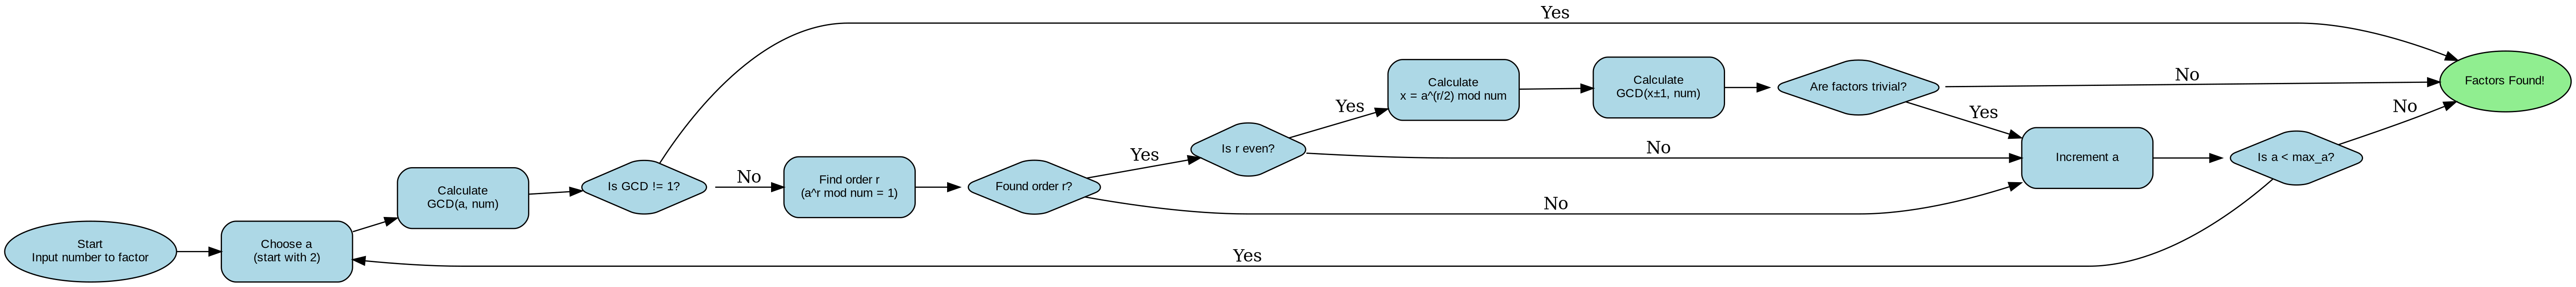

In [51]:
# Check for system Graphviz before attempting to render
import shutil

if shutil.which('dot') is None:
    print("⚠️  System Graphviz (dot command) not found!")
    print("   Install it with: sudo apt-get install graphviz")
    print("   The Python 'graphviz' package alone is NOT enough.")
    print("\n   Skipping flowchart generation to prevent kernel crash.")
else:
    # Install Python graphviz package if needed (do this ONCE, outside notebook ideally)
    # %pip install -q graphviz
    import graphviz
    import os

    try:
        # Create a new directed graph with automatic layout
        dot = graphviz.Digraph(comment='Shor\'s Algorithm Flow')
        dot.attr(rankdir='LR', size='20,20')  # Smaller square aspect ratio for image
        dot.graph_attr['dpi'] = '300'         # Higher DPI for sharper PNG
        
        # Let Graphviz size nodes automatically to fit labels, but use smaller font
        dot.attr('node', shape='box', style='rounded,filled', fillcolor='lightblue', fontname='Arial', fontsize='10', width='1.5', height='0.7')
        
        # Add nodes (automatic positioning, no fixedsize)
        dot.node('A', 'Start\nInput number to factor', shape='oval')
        dot.node('B', 'Choose a\n(start with 2)')
        dot.node('C', 'Calculate\nGCD(a, num)')
        dot.node('D', 'Is GCD != 1?', shape='diamond')
        dot.node('E', 'Find order r\n(a^r mod num = 1)')
        dot.node('F', 'Found order r?', shape='diamond')
        dot.node('G', 'Is r even?', shape='diamond')
        dot.node('H', 'Calculate\nx = a^(r/2) mod num')
        dot.node('I', 'Calculate\nGCD(x±1, num)')
        dot.node('J', 'Are factors trivial?', shape='diamond')
        dot.node('K', 'Factors Found!', shape='oval', fillcolor='lightgreen')
        dot.node('L', 'Increment a')
        dot.node('M', 'Is a < max_a?', shape='diamond')
        
        # Add edges with labels
        dot.edge('A', 'B')
        dot.edge('B', 'C')
        dot.edge('C', 'D')
        dot.edge('D', 'E', 'No')
        dot.edge('D', 'K', 'Yes')
        dot.edge('E', 'F')
        dot.edge('F', 'G', 'Yes')
        dot.edge('F', 'L', 'No')
        dot.edge('G', 'H', 'Yes')
        dot.edge('G', 'L', 'No')
        dot.edge('H', 'I')
        dot.edge('I', 'J')
        dot.edge('J', 'K', 'No')
        dot.edge('J', 'L', 'Yes')
        dot.edge('L', 'M')
        dot.edge('M', 'B', 'Yes')
        dot.edge('M', 'K', 'No')
        
        # Render the graph with error handling
        try:
            # Render with automatic layout and high DPI
            dot.render('shors_algorithm_for_classical_flowchart', format='png', cleanup=True)
            print("✓ Smaller, square automatic flowchart created successfully!")
            
            # Display the image in the notebook
            from IPython.display import Image, display
            display(Image('shors_algorithm_for_classical_flowchart.png'))
        except Exception as e:
            print(f"Error rendering the flowchart: {str(e)}")
            print("Please make sure you have Graphviz installed on your system.")
            print("You can install it on Ubuntu/Debian with: sudo apt-get install graphviz")
            
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        print("Please ensure graphviz is properly installed and all dependencies are met.")

In [9]:
n=int(input("input number to find period"))
a=int(input("input base a"))
rmax=int(input("input max period to search"))
r=0
while r<=rmax:
  if pow(a, r, n) != 1 or r == 0:
    print(f"{a}^{r} mod {n} = {pow(a, r, n)}")
    r=r+1
  else:
    print(f"{a}^{r} mod {n} = {pow(a, r, n)} <---- Peirod found {i}")
    r=rmax+1

2^0 mod 12 = 1
2^1 mod 12 = 2
2^2 mod 12 = 4
2^3 mod 12 = 8
2^4 mod 12 = 4
2^5 mod 12 = 8
2^6 mod 12 = 4
2^7 mod 12 = 8
2^8 mod 12 = 4
2^9 mod 12 = 8
2^10 mod 12 = 4
2^11 mod 12 = 8
2^12 mod 12 = 4
2^13 mod 12 = 8
2^14 mod 12 = 4
2^15 mod 12 = 8
2^16 mod 12 = 4
2^17 mod 12 = 8
2^18 mod 12 = 4
2^19 mod 12 = 8
2^20 mod 12 = 4
2^21 mod 12 = 8
2^22 mod 12 = 4
2^23 mod 12 = 8
2^24 mod 12 = 4
2^25 mod 12 = 8
2^26 mod 12 = 4
2^27 mod 12 = 8
2^28 mod 12 = 4
2^29 mod 12 = 8
2^30 mod 12 = 4
2^31 mod 12 = 8
2^32 mod 12 = 4
2^33 mod 12 = 8
2^34 mod 12 = 4
2^35 mod 12 = 8
2^36 mod 12 = 4
2^37 mod 12 = 8
2^38 mod 12 = 4
2^39 mod 12 = 8
2^40 mod 12 = 4
2^41 mod 12 = 8
2^42 mod 12 = 4
2^43 mod 12 = 8
2^44 mod 12 = 4
2^45 mod 12 = 8
2^46 mod 12 = 4
2^47 mod 12 = 8
2^48 mod 12 = 4
2^49 mod 12 = 8
2^50 mod 12 = 4
2^51 mod 12 = 8
2^52 mod 12 = 4
2^53 mod 12 = 8
2^54 mod 12 = 4
2^55 mod 12 = 8
2^56 mod 12 = 4
2^57 mod 12 = 8
2^58 mod 12 = 4
2^59 mod 12 = 8
2^60 mod 12 = 4
2^61 mod 12 = 8
2^62 mod 12 = 4
2^